In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import the dataset 

In [426]:
df = pd.read_csv('/Users/gaurav/Desktop/Education/INFO521/project/Bitcoin_Heist/data/BitcoinHeistData.csv')
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [427]:
print("Dataset description")
df.describe()

Dataset description


,year,day,length,weight,count,looped,neighbors,income
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.012048e+03,1.735295e+02,2.631742e+01,5.406222e-01,1.582070e+02,3.608665e+01,2.324220e+00,9.026359e+09
std,1.005057e+00,1.001409e+02,4.272004e+01,2.990846e+00,6.024127e+02,2.884734e+02,1.862359e+01,2.555870e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.610000e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.011000e+03,8.800000e+01,0.000000e+00,1.897321e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.086922e+08
50%,2.012000e+03,1.710000e+02,6.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+08
75%,2.013000e+03,2.560000e+02,2.800000e+01,5.606003e-01,8.000000e+00,0.000000e+00,2.000000e+00,2.519020e+09
max,2.018000e+03,3.650000e+02,1.440000e+02,4.982885e+02,1.346200e+04,1.169300e+04,3.776000e+03,4.996440e+13


# EDA: Exploratory data analysis (Trying to Convert raw data to useful data)
It consists of steps to answers some basic yet important question about the dataset like how many Numerical feature are there?, How many categorical feature may be there?, Missing Values, outliers, Does RAW data  need cleaning?

### Features: 
address: Bitcoin address. The address used for the transaction of the Bitcoin. Data type = String

year:  Year of transaction. Data type = Integer

day:  Day of the year. 1 is the first day, 365 is the last day. Data type = Integer

length:  Quantifies the mixing of the Bitcoin, where received transactions were distributed similarly to hide the origin of the Heist. Data type = Integer

weight:  Quantifies the merging pattern of the transactions that have more inputs addresses than the output addresses. It represents the information of the amount merged from several addresses. Data type = Float

count:  Similar to weight, it represents the number of transactions from different input addresses. Data type = Integer

looped:  It represents the number of times the coin was split, moved to some other address, and merged back to a single address where those coins will be cashed out. Data type = Integer

neighbors

income: The total ransom amount in Satoshis (1 bitcoin = 100 million satoshis). Data type = Integer

label: Name of the ransomware team. Data type = String


It can be obsereved from the sample of the data, there are 5 categorical features(address, year, day, neighbors, label) and 5 numerical features(length, weight, count, looped, income).  Let's start with checking if there are any missing values.

### Missing values

<AxesSubplot:>

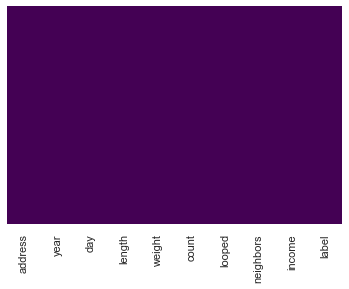

In [428]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

That's GREAT!! Fortunately, there are no missing values in our dataset. It's rare to get such a dataset. But even if in case, we eneded up having some missing values, those would have been represented as the horizontal yellow dash line. In that case, we could have used three main tools, namely Mean, Meadian, and Mode. It depends on the requirement and the data, which one should use and when. 

## Analysing  categorical features

We have totall 5 categorical values i.e. address, year, day, neighbors,  label.  Out of them, we can see that address, day, and neighbors are not something that impact the final label that much. Any address can be used for Bitcoin Heist, and that can happen on any day of the year. Hence we can drop these columns.  

In [429]:
for col in ['address', 'day', 'neighbors']:
    df.drop(col, axis=1, inplace=True)

df.head()

,year,length,weight,count,looped,income,label
0,2017,18,0.008333,1,0,100050000.0,princetonCerber
1,2016,44,0.000244,1,0,100000000.0,princetonLocky
2,2016,0,1.000000,1,0,200000000.0,princetonCerber
3,2016,72,0.003906,1,0,71200000.0,princetonCerber
4,2016,144,0.072848,456,0,200000000.0,princetonLocky


#### Analysing category "year"

In [430]:
# Total number of categories in year
year_dict = df['year'].value_counts().to_dict()
year_dict

{2012: 365714,
 2011: 355349,
 2013: 294372,
 2016: 15631,
 2014: 10319,
 2015: 3701,
 2017: 3486,
 2018: 3}

#### Distribution of the category "year" on Log scale

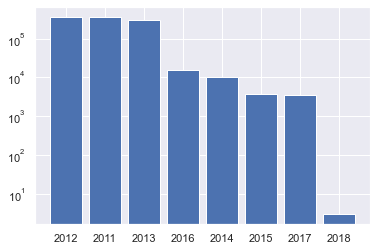

In [431]:
plt.bar(range(len(year_dict)), list(year_dict.values()), log=True, align='center')
plt.xticks(range(len(year_dict)), list(year_dict.keys()))
plt.show()

As can be seen, year 2018 only has 3 datapoints which are very less compared to other years. Hence this year can be dropped from our dataset. Also, it can be seen that the dataset, based on "year" category, is quite imbalanced. We will deal with this later.

One thing that can be noticed form the above dictionary is that the number if attacks get reduced with years. There could be couple of reasons for this -- either due to betterment of technology, it becomes more challanging to heist. Botcoin with the ease it was done done before or the dataset hasn't been updated properly due to ehich we are seeing this imbalance in the datapoints for "year" categories.

In [432]:
index_2018 = df[df['year']==2018].index
df.drop(index_2018, inplace = True)
df.head()

,year,length,weight,count,looped,income,label
0,2017,18,0.008333,1,0,100050000.0,princetonCerber
1,2016,44,0.000244,1,0,100000000.0,princetonLocky
2,2016,0,1.000000,1,0,200000000.0,princetonCerber
3,2016,72,0.003906,1,0,71200000.0,princetonCerber
4,2016,144,0.072848,456,0,200000000.0,princetonLocky


#### Analysing category "label"

In [433]:
# Total number of categories in label
label_dict = df['label'].value_counts().to_dict()
label_dict

{'white': 1007162,
 'paduaCryptoWall': 12390,
 'montrealCryptoLocker': 9315,
 'princetonCerber': 9223,
 'princetonLocky': 6625,
 'montrealCryptXXX': 2419,
 'montrealNoobCrypt': 483,
 'montrealDMALockerv3': 354,
 'montrealDMALocker': 251,
 'montrealSamSam': 62,
 'montrealCryptoTorLocker2015': 55,
 'montrealGlobeImposter': 55,
 'montrealGlobev3': 34,
 'montrealGlobe': 32,
 'montrealWannaCry': 28,
 'montrealRazy': 12,
 'montrealAPT': 11,
 'paduaKeRanger': 10,
 'montrealXTPLocker': 8,
 'montrealXLockerv5.0': 7,
 'montrealVenusLocker': 7,
 'montrealCryptConsole': 7,
 'montrealFlyper': 7,
 'montrealEDA2': 6,
 'montrealJigSaw': 4,
 'paduaJigsaw': 2,
 'montrealXLocker': 1,
 'montrealSam': 1,
 'montrealComradeCircle': 1}

##### Distribution of the category "label" on Log scale

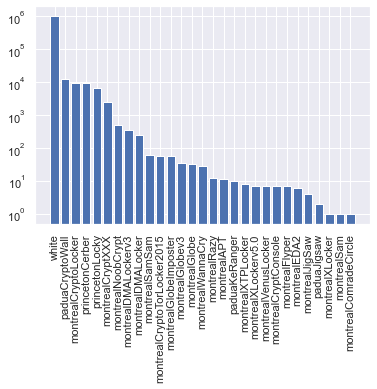

In [434]:
plt.bar(range(len(label_dict)), list(label_dict.values()), align='center', log=True)
plt.xticks(range(len(label_dict)), list(label_dict.keys()), rotation = 'vertical')
plt.show()

There is an imbalance that can be observed from the above distribution. There are few labels that have very less impact on the dataset comapred to others, hence we can drop datapoints having that category as label. We can set a threshold frequency datapoints falling in that category, based on which the datset can be filtered. 
###### Drop the category "label" that has less than 100 datapoints. 

In [435]:
for k,v in label_dict.items():
    if v<100: 
        index_k = df[df['label']==k].index
        df.drop(index_k, inplace = True)

print('Final labels')
df['label'].value_counts().to_dict()

Final labels


{'white': 1007162,
 'paduaCryptoWall': 12390,
 'montrealCryptoLocker': 9315,
 'princetonCerber': 9223,
 'princetonLocky': 6625,
 'montrealCryptXXX': 2419,
 'montrealNoobCrypt': 483,
 'montrealDMALockerv3': 354,
 'montrealDMALocker': 251}

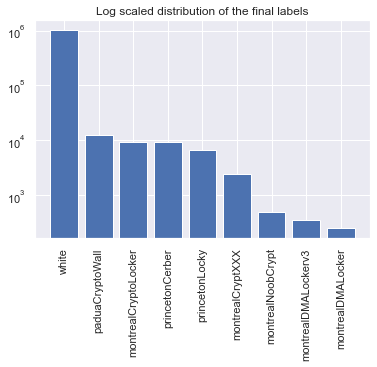

{'white': 1007162, 'paduaCryptoWall': 12390, 'montrealCryptoLocker': 9315, 'princetonCerber': 9223, 'princetonLocky': 6625, 'montrealCryptXXX': 2419, 'montrealNoobCrypt': 483, 'montrealDMALockerv3': 354, 'montrealDMALocker': 251}


In [436]:
def plotting_labels():

    """
    Distribution of final labels and datapoints
    """

    new_label_dict = df['label'].value_counts().to_dict()
    plt.bar(range(len(new_label_dict)), list(new_label_dict.values()), align='center', log=True)
    plt.xticks(range(len(new_label_dict)), list(new_label_dict.keys()), rotation = 'vertical')
    plt.title('Log scaled distribution of the final labels')
    plt.show()

plotting_labels()
print(new_label_dict)


## Visualizing individual numerical features 

Due to sheer number of datapoints and such a variation in the minimum, maximum, and standrad deviation, we will be using log scale to plot the distributions to visualize them clearly. 

### Length

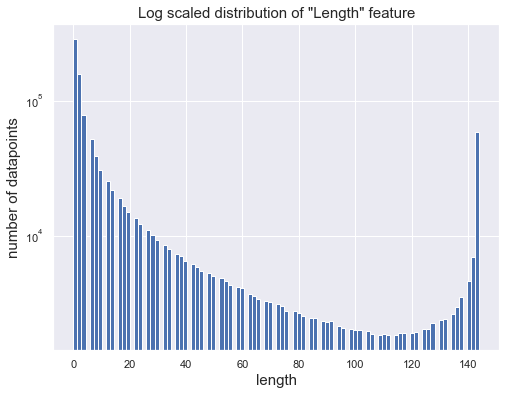

In [437]:
plt.figure(figsize=(8,6))
plt.hist(df['length'], bins=100, log=True)
plt.xlabel('length', fontsize=15)
plt.ylabel('number of datapoints', fontsize=15)
plt.title('Log scaled distribution of "Length" feature', fontsize=15)
plt.show()

#### Year wise Log scaled distribution of "Length" feature -- number of datapoints v/s length

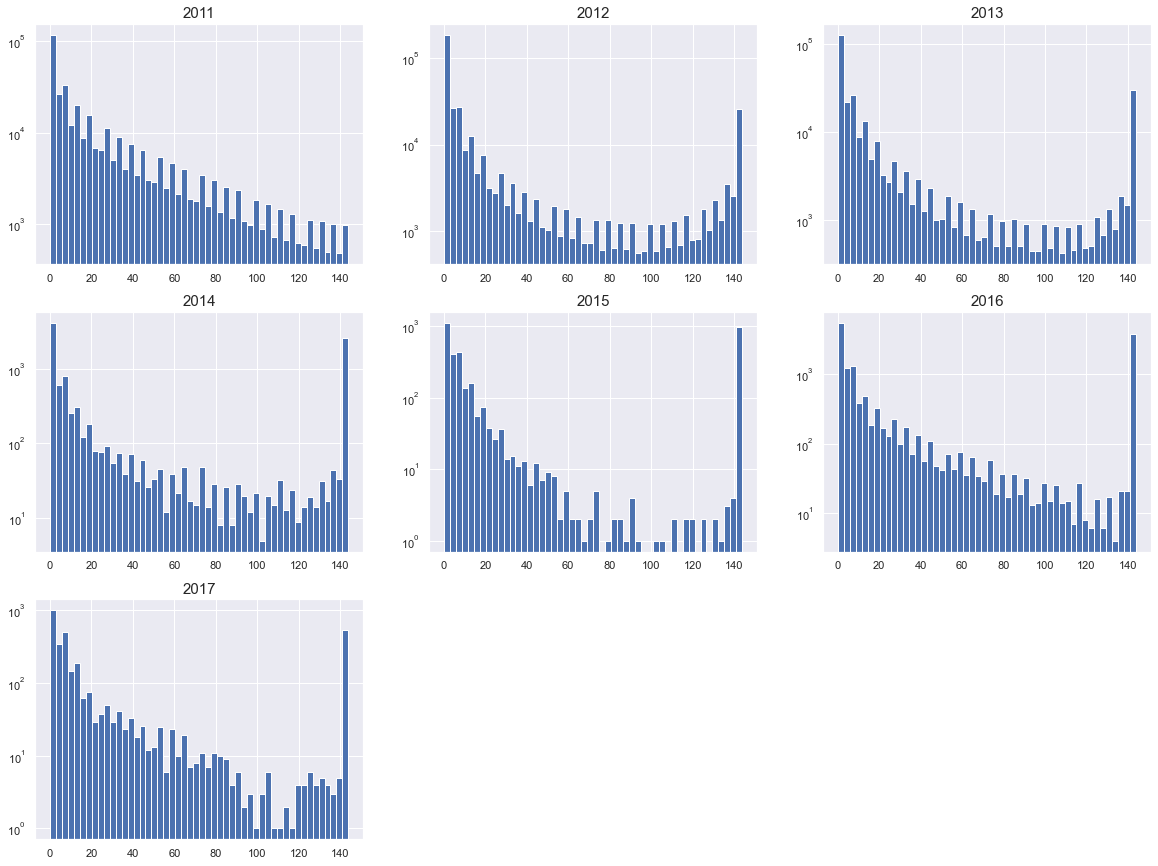

In [438]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
year = [2011, 2012, 2013, 2014, 2015, 2016,  2017]

for c,y in zip(cord, year):
    plt.subplot(c)
    plt.hist(df[df['year']==y]['length'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


#### Label wise Log scaled distribution of "Length" feature -- number of datapoints v/s length

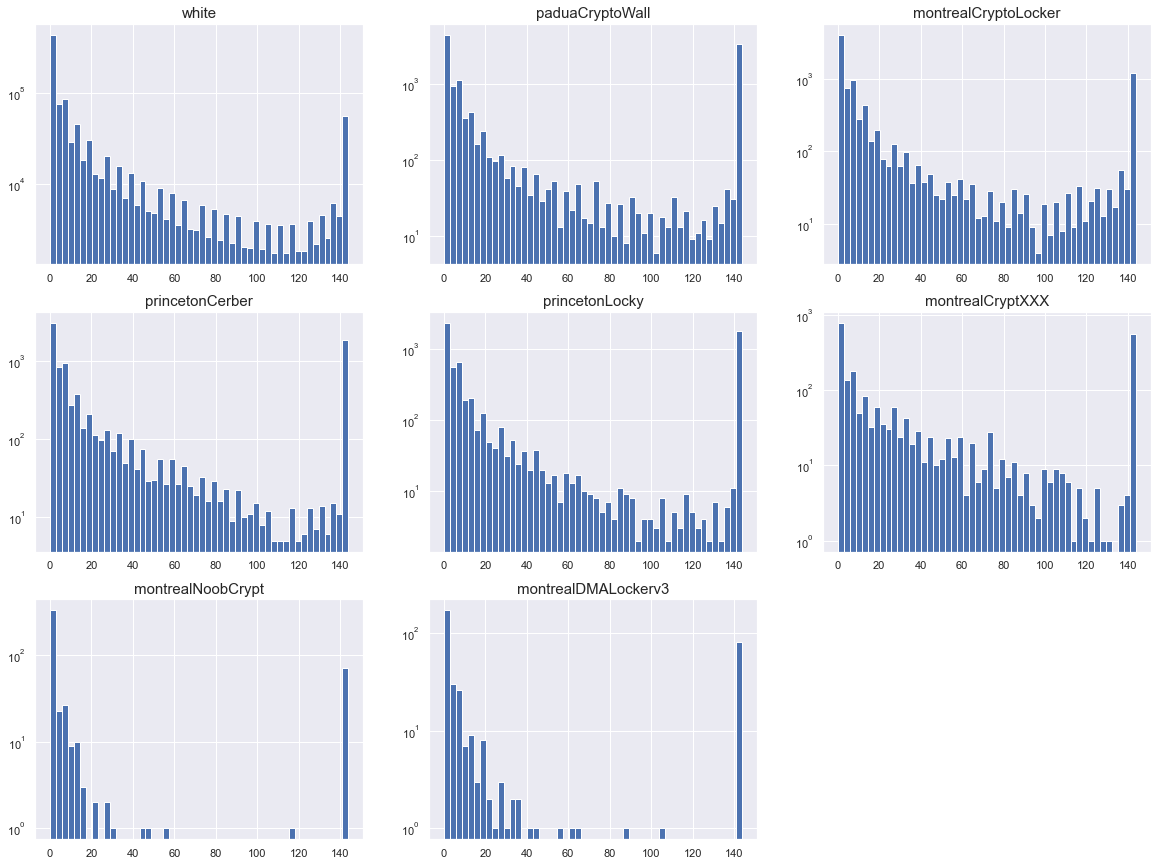

In [439]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
label = label_dict.keys()

for c,y in zip(cord, label):
    plt.subplot(c)
    plt.hist(df[df['label']==y]['length'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


#### Observation

write down the observation


### Weight

In [440]:
df['weight'].describe()

count    1.048222e+06
mean     5.400628e-01
std      2.951285e+00
min      3.610000e-94
25%      1.895375e-02
50%      2.500000e-01
75%      5.602329e-01
max      2.937263e+02
Name: weight, dtype: float64

We can see that the standard deviation is only of 2.951285 and the mean of the feature is approx 0.540062. Therefore, values in this will be comparitively small and need to be scaled to get better insight. Hence we will use the log distribution for this column. 

NOTE: We are using Log scale to plot the Negative Log distribution since most of the values are less than 1.

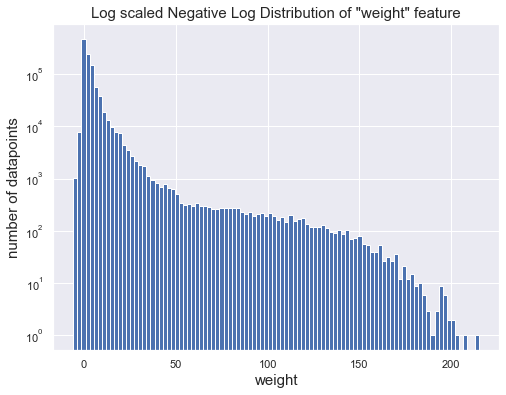

In [441]:
plt.figure(figsize=(8,6))
plt.hist(-np.log(df['weight']), bins=100, log=True)
plt.xlabel('weight', fontsize=15)
plt.ylabel('number of datapoints', fontsize=15)
plt.title('Log scaled Negative Log Distribution of "weight" feature', fontsize=15)
plt.show()

##### Year wise Log scaled Negative Log distribution of "weight" feature -- number of datapoints v/s negative log of weight

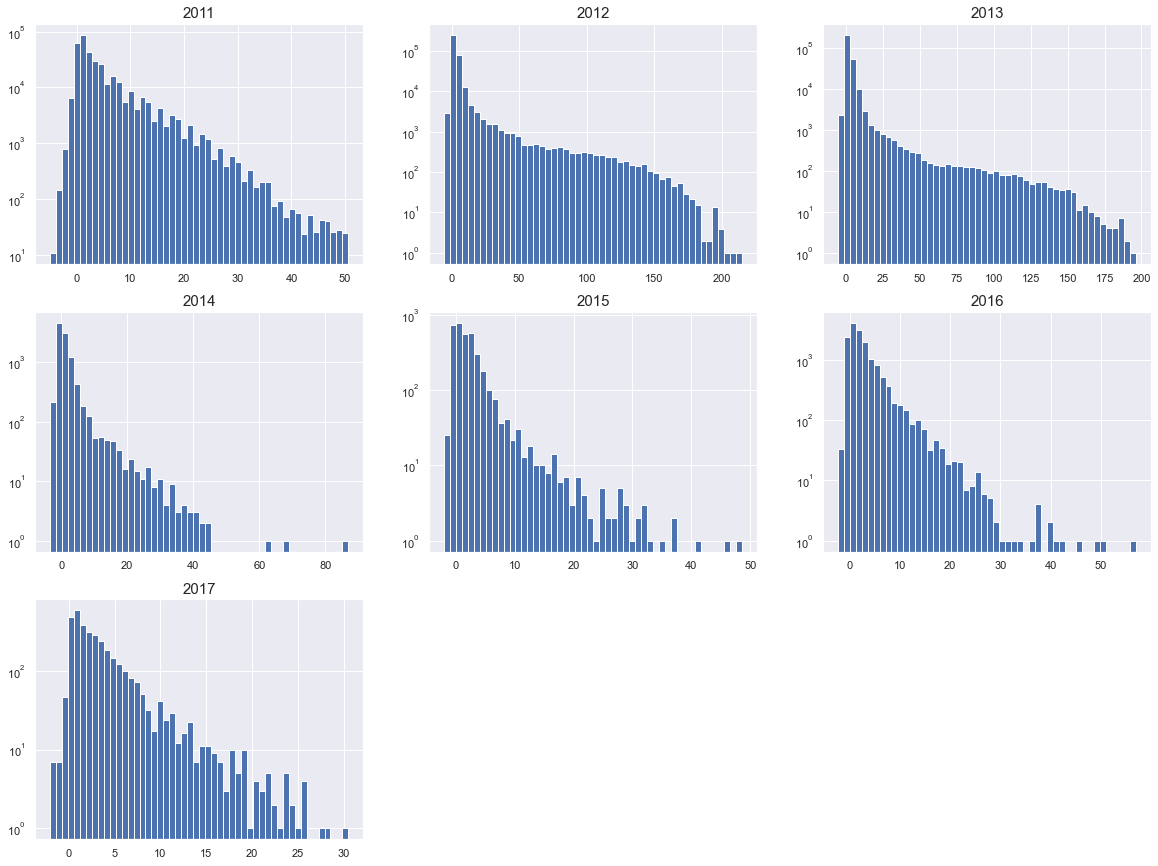

In [442]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
year = [2011, 2012, 2013, 2014, 2015, 2016,  2017]

for c,y in zip(cord, year):
    plt.subplot(c)
    plt.hist(-np.log(df[df['year']==y]['weight']), bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


##### Label wise Log scaled Negative Log distribution of "weight" feature -- number of datapoints v/s negative log of weight

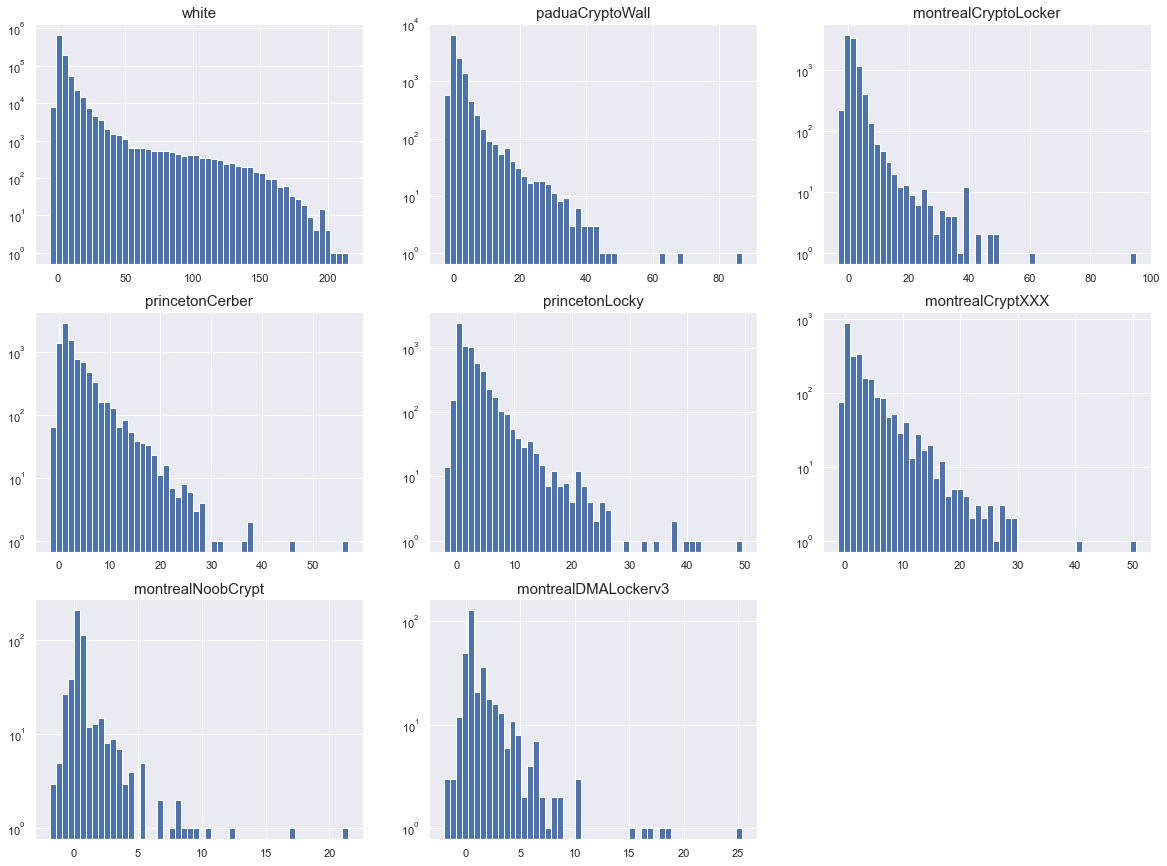

In [443]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
label = label_dict.keys()

for c,y in zip(cord, label):
    plt.subplot(c)
    plt.hist(-np.log(df[df['label']==y]['weight']), bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


#### Obseravtion

write down the observation

### Count

In [444]:
df['count'].describe()

count    1.048222e+06
mean     1.578377e+02
std      6.006760e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      8.000000e+00
max      1.346200e+04
Name: count, dtype: float64

In [445]:
len(df[df['count']==1])/len(df)

0.6315627796401907

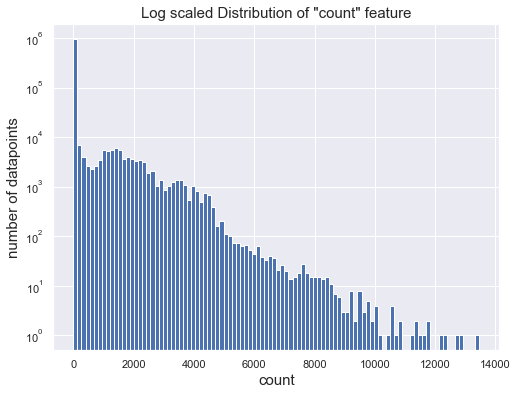

In [446]:
plt.figure(figsize=(8,6))
plt.hist(df['count'], bins=100, log=True)
plt.xlabel('count', fontsize=15)
plt.ylabel('number of datapoints', fontsize=15)
plt.title('Log scaled Distribution of "count" feature', fontsize=15)
plt.show()

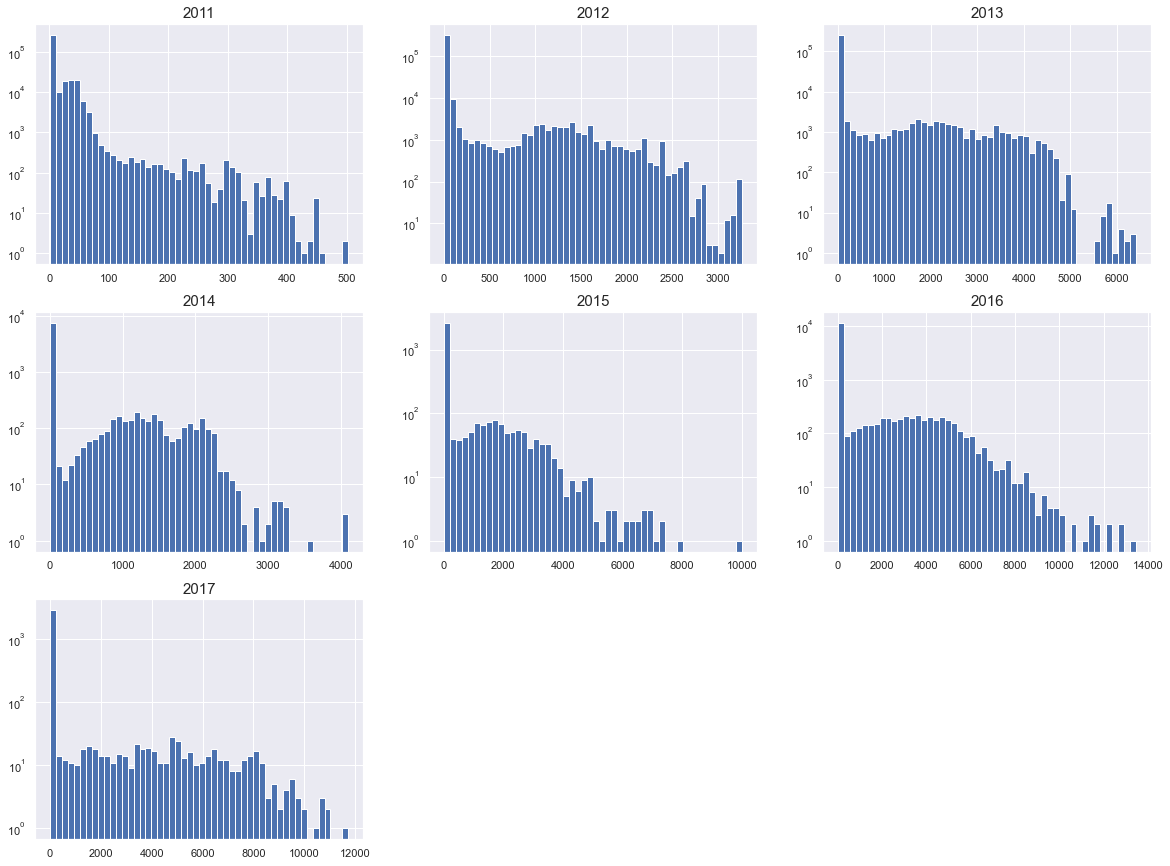

In [447]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
year = [2011, 2012, 2013, 2014, 2015, 2016,  2017]

for c,y in zip(cord, year):
    plt.subplot(c)
    plt.hist(df[df['year']==y]['count'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


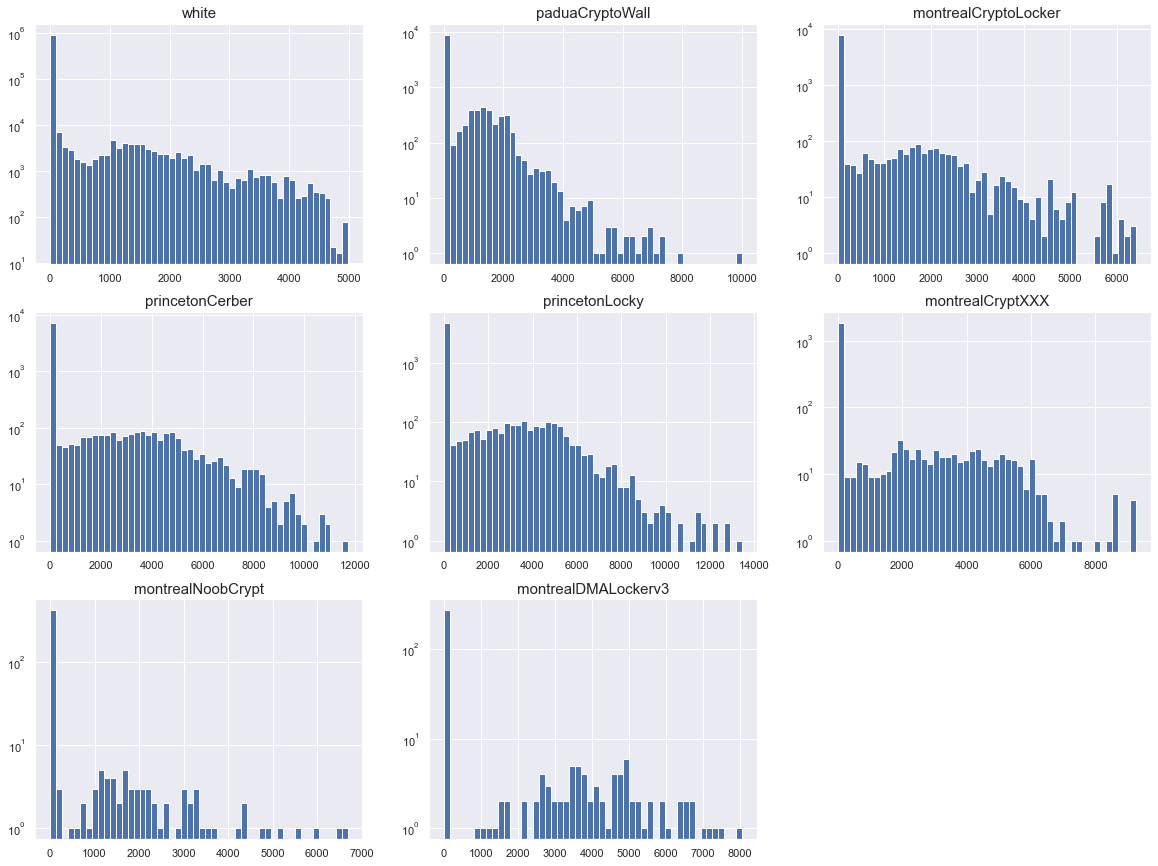

In [448]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
label = label_dict.keys()

for c,y in zip(cord, label):
    plt.subplot(c)
    plt.hist(df[df['label']==y]['count'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)


#### Observation 

Write down the observation

### Looped

In [449]:
df['looped'].describe()

count    1.048222e+06
mean     3.602108e+01
std      2.879360e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.169300e+04
Name: looped, dtype: float64

In [450]:
len(df[df['looped']==0])/len(df)

0.92828522965555

Provided that more than 92% of values of this feature are 0, there is no need to consider this feature for our model. Hence, we will drop "looped" feature.

In [451]:
df.drop('looped', axis=1, inplace=True)
df.head()

,year,length,weight,count,income,label
0,2017,18,0.008333,1,100050000.0,princetonCerber
1,2016,44,0.000244,1,100000000.0,princetonLocky
2,2016,0,1.000000,1,200000000.0,princetonCerber
3,2016,72,0.003906,1,71200000.0,princetonCerber
4,2016,144,0.072848,456,200000000.0,princetonLocky


### Income

In [452]:
df['income'].describe()


count    1.048222e+06
mean     9.026386e+09
std      2.556174e+11
min      3.000000e+07
25%      1.087632e+08
50%      5.000000e+08
75%      2.520000e+09
max      4.996440e+13
Name: income, dtype: float64

#### Log Scaled Distribution of "income" feature 

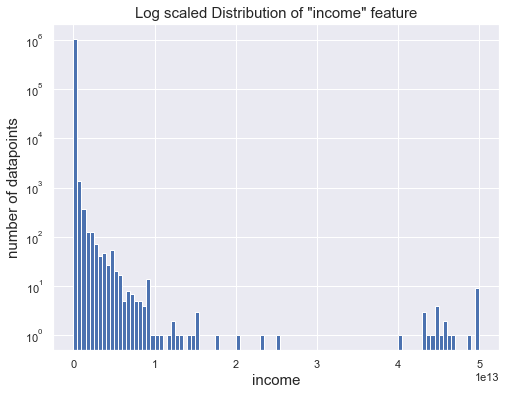

In [453]:
plt.figure(figsize=(8,6))
plt.hist(df['income'], bins=100, log=True)
plt.xlabel('income', fontsize=15)
plt.ylabel('number of datapoints', fontsize=15)
plt.title('Log scaled Distribution of "income" feature', fontsize=15)
plt.show()

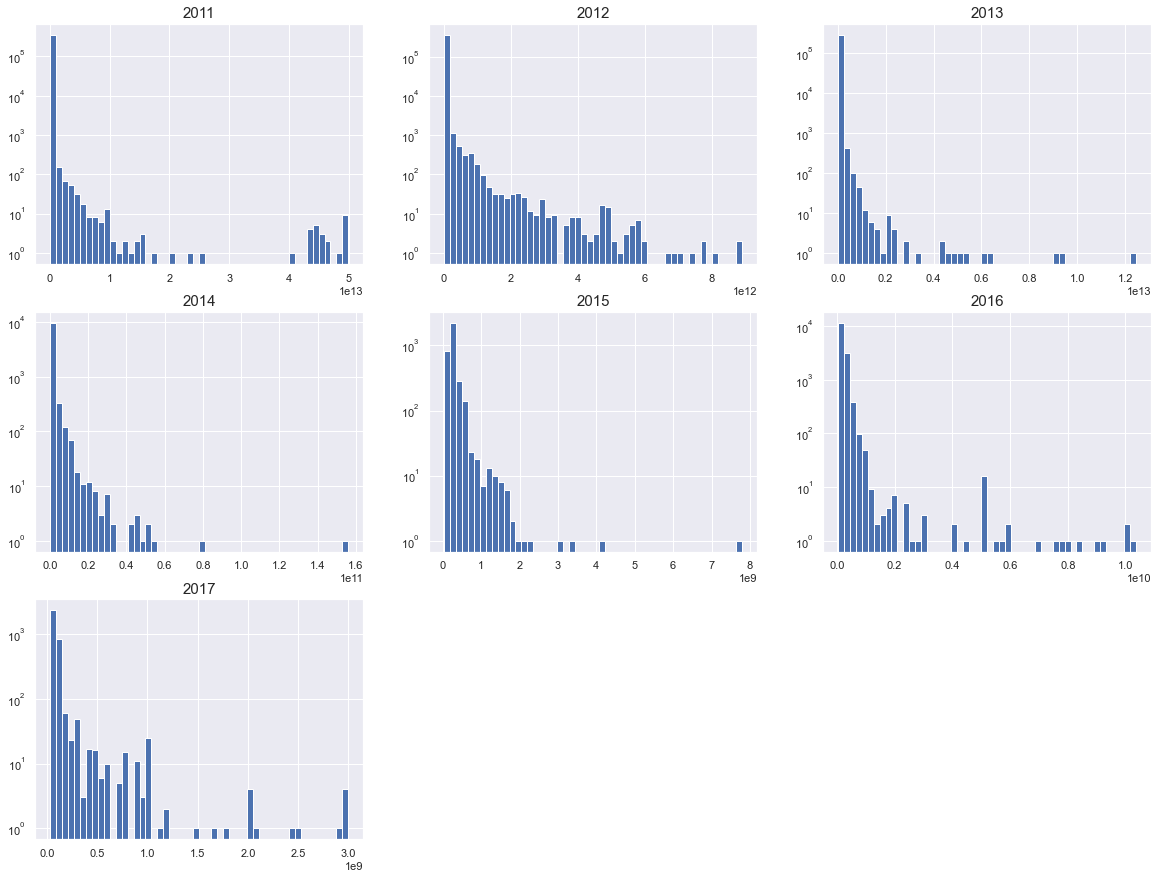

In [454]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
year = [2011, 2012, 2013, 2014, 2015, 2016,  2017]

for c,y in zip(cord, year):
    plt.subplot(c)
    plt.hist(df[df['year']==y]['income'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)

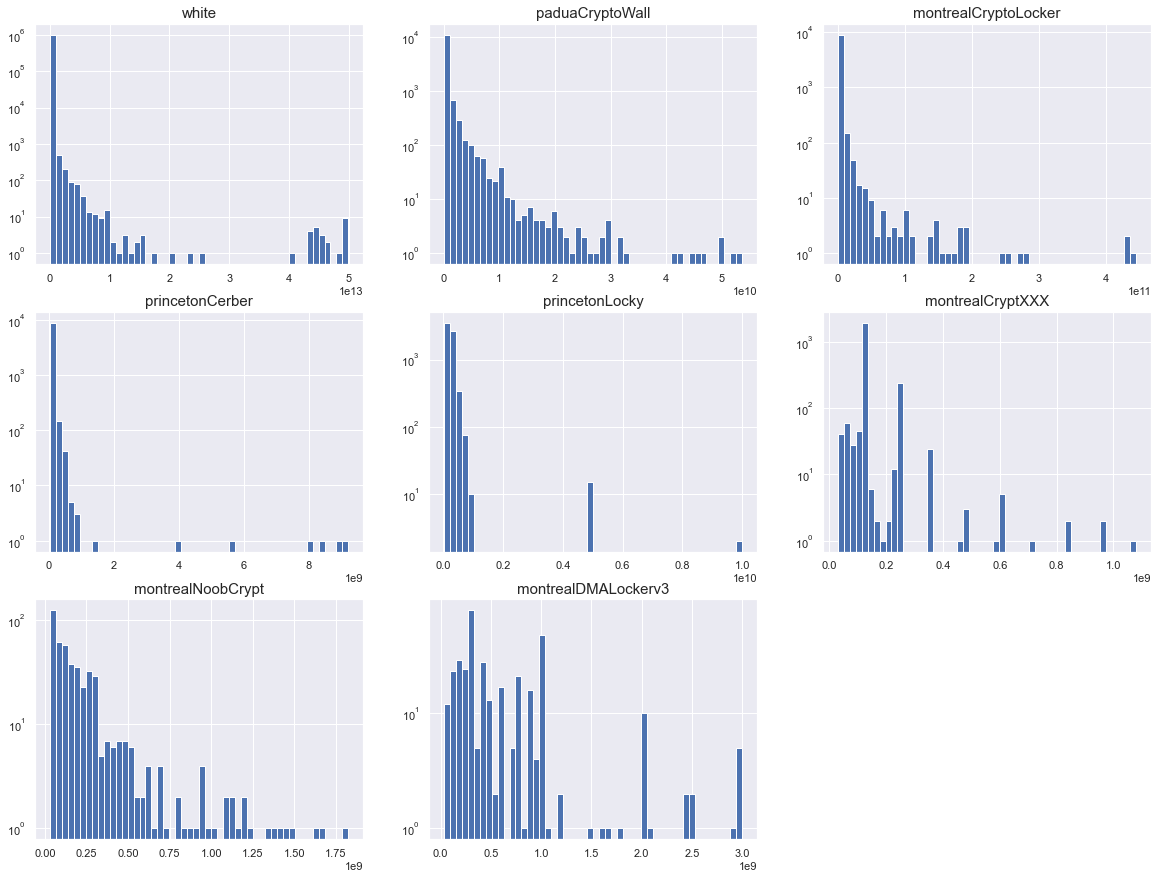

In [455]:
plt.figure(figsize=(20,15))

cord = [331, 332, 333, 334, 335,  336, 337, 338]
label = label_dict.keys()

for c,y in zip(cord, label):
    plt.subplot(c)
    plt.hist(df[df['label']==y]['income'], bins=50, log=True)
    plt.title(str(y),fontsize=15)
    plt.grid(True)

##### Observation

write down 



## Detecting and Removing Outliers

To **detect** the outliers, we will use **Inter Quartile Range(IQR)**. The basic concepts behind IQR is: 

Let Q1 = 25 percentile

Q2 = 75 percentile

IQR = Q2-Q1

upper bound = Q2 + 1.5 x IQR

lower bound = Q1 - 1.5 x IQR

Any value beyond the range of upper and lower bound will be replaced by the upper and lower bound values respectively.

for more details, refer to given blog:
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

This code uses some parts of the code provided in this blog.

Text(0.5, 0, 'length')

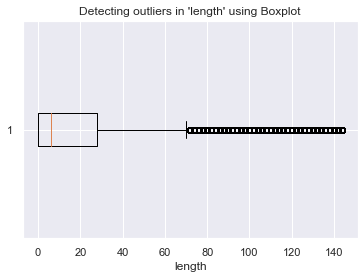

In [456]:
sample = df['length']

import matplotlib.pyplot as plt
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers in 'length' using Boxplot")
plt.xlabel('length')

In [457]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound
sample_outliers, lwr_bound, upr_bound = detect_outliers_iqr(sample)
print(f'The lower bound value: {lwr_bound}')
print(f'The lower bound value: {upr_bound}')
print("Total number of outliers from IQR method: ", len(sample_outliers))
print(f"Percentage of outliers out of the feature 'length' is {(len(sample_outliers)/len(sample))*100}% ")

The lower bound value: -42.0
The lower bound value: 70.0
Total number of outliers from IQR method:  147513
Percentage of outliers out of the feature 'length' is 14.07268689266205% 


New array: 0          18.0
1          44.0
2           0.0
3          70.0
4          70.0
           ... 
1048570    70.0
1048571    70.0
1048572     4.0
1048573     2.0
1048574    26.0
Name: length, Length: 1048222, dtype: float64


Text(0.5, 0, 'length')

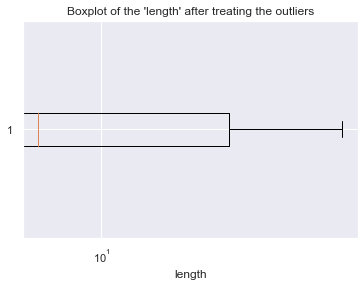

In [458]:
# Replacing the outliers
df['length'] = np.where(df['length']<lwr_bound, lwr_bound, df['length'])
df['length'] = np.where(df['length']>upr_bound, upr_bound, df['length'])
print("New array:",df['length'])

# Plotting BoxPlot of new dataset
plt.boxplot(df['length'], vert=False)
plt.xscale('log')
plt.title("Boxplot of the 'length' after treating the outliers")
plt.xlabel("length")

### weight

Text(0.5, 0, 'weight')

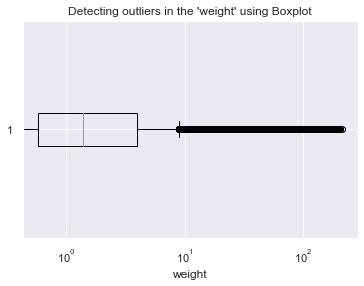

In [459]:
df['weight'] = -np.log(df['weight'])
sample = df['weight']
plt.boxplot(sample, vert=False)
plt.xscale('log')
plt.title("Detecting outliers in the 'weight' using Boxplot")
plt.xlabel('weight')

In [460]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound
sample_outliers, lwr_bound, upr_bound = detect_outliers_iqr(sample)
print(f'The lower bound value: {lwr_bound}')
print(f'The lower bound value: {upr_bound}')
print("Total number of outliers from IQR method: ", len(sample_outliers))
print(f"Percentage of outliers out of the feature 'weight' is {(len(sample_outliers)/len(sample))*100}% ")

The lower bound value: -4.500123074255884
The lower bound value: 9.045279155864112
Total number of outliers from IQR method:  96644
Percentage of outliers out of the feature 'weight' is 9.219802675387466% 


New array: 0          4.787492
1          8.317765
2         -0.000000
3          5.545177
4          2.619375
             ...   
1048570    9.045279
1048571    9.045279
1048572    1.386294
1048573    1.609438
1048574    0.693147
Name: weight, Length: 1048222, dtype: float64


Text(0.5, 0, 'weight')

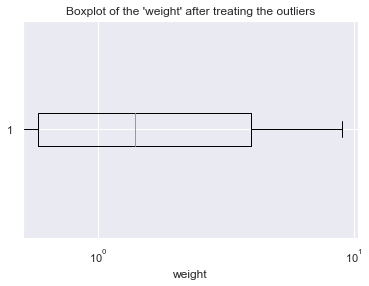

In [461]:
# Replacing the outliers
df['weight'] = np.where(df['weight']<lwr_bound, lwr_bound, df['weight'])
df['weight'] = np.where(df['weight']>upr_bound, upr_bound, df['weight'])
print("New array:",df['weight'])

# Plotting BoxPlot of new dataset
plt.boxplot(df['weight'], vert=False)
plt.xscale('log')
plt.title("Boxplot of the 'weight' after treating the outliers")
plt.xlabel("weight")

### count

Text(0.5, 0, 'count')

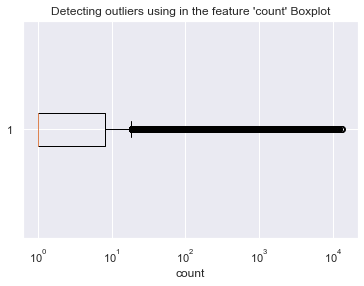

In [462]:
sample = df['count']


plt.boxplot(sample, vert=False)
plt.xscale('log')
plt.title("Detecting outliers using in the feature 'count' Boxplot")
plt.xlabel('count')

In [463]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound
sample_outliers, lwr_bound, upr_bound = detect_outliers_iqr(sample)
print(f'The lower bound value: {lwr_bound}')
print(f'The lower bound value: {upr_bound}')
print("Total number of outliers from IQR method: ", len(sample_outliers))
print(f"Percentage of outliers out of the feature 'count' is {(len(sample_outliers)/len(sample))*100}% ")

The lower bound value: -9.5
The lower bound value: 18.5
Total number of outliers from IQR method:  223663
Percentage of outliers out of the feature 'count' is 21.337369374044812% 


New array: 0           1.0
1           1.0
2           1.0
3           1.0
4          18.5
           ... 
1048570    18.5
1048571     1.0
1048572     1.0
1048573     1.0
1048574     1.0
Name: count, Length: 1048222, dtype: float64


Text(0.5, 0, 'count')

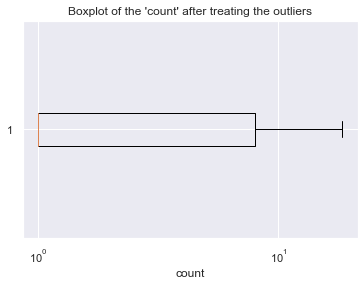

In [464]:
# Replacing the outliers
df['count'] = np.where(df['count']<lwr_bound, lwr_bound, df['count'])
df['count'] = np.where(df['count']>upr_bound, upr_bound, df['count'])
print("New array:",df['count'])

# Plotting BoxPlot of new dataset
plt.boxplot(df['count'], vert=False)
plt.xscale('log')
plt.title("Boxplot of the 'count' after treating the outliers")
plt.xlabel("count")

### Income

Text(0.5, 0, 'income')

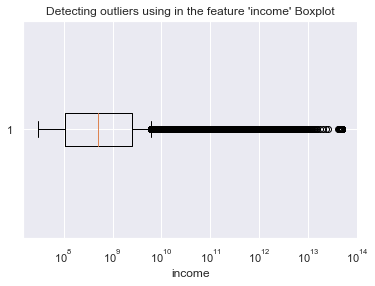

In [465]:
sample = df['income']

plt.boxplot(sample, vert=False)
plt.xscale('log')
plt.title("Detecting outliers using in the feature 'income' Boxplot")
plt.xlabel('income')

In [466]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound
sample_outliers, lwr_bound, upr_bound = detect_outliers_iqr(sample)
print(f'The lower bound value: {lwr_bound}')
print(f'The lower bound value: {upr_bound}')
print("Total number of outliers from IQR method: ", len(sample_outliers))
print(f"Percentage of outliers out of the feature 'income' is {(len(sample_outliers)/len(sample))*100}% ")

The lower bound value: -3508091875.0
The lower bound value: 6136855125.0
Total number of outliers from IQR method:  121383
Percentage of outliers out of the feature 'income' is 11.579894335360258% 


New array: 0          1.000500e+08
1          1.000000e+08
2          2.000000e+08
3          7.120000e+07
4          2.000000e+08
               ...     
1048570    5.500000e+07
1048571    6.136855e+09
1048572    1.563393e+08
1048573    5.553651e+09
1048574    5.855557e+07
Name: income, Length: 1048222, dtype: float64


Text(0.5, 0, 'income')

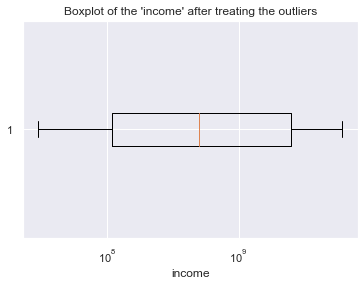

In [467]:
# Replacing the outliers
df['income'] = np.where(df['income']<lwr_bound, lwr_bound, df['income'])
df['income'] = np.where(df['income']>upr_bound, upr_bound, df['income'])
print("New array:",df['income'])

# Plotting BoxPlot of new dataset
plt.boxplot(df['income'], vert=False)
plt.xscale('log')
plt.title("Boxplot of the 'income' after treating the outliers")
plt.xlabel("income")

## Defining scaling function for the numerical features of the dataset

In [468]:
def scaling(X):   
    #X = df.iloc[:,1:-1]

    from sklearn.preprocessing import StandardScaler
    sc_x = StandardScaler()
    X = sc_x.fit_transform(X)
    X_scaled = pd.DataFrame(X)
    X_scaled.columns = df.columns[1:-1]
    X_scaled.head()
    
    return X_scaled

## Correlation and pairplot for original dataset

In [470]:
from sklearn.utils import shuffle
X = df.iloc[:,1:-1]
X_scaled = shuffle(scaling(X))
sample_corr = pd.DataFrame(X_scaled).iloc[:104822,:]
sample_corr.columns = df.columns[1:-1]
sample_corr.head()

,0,1,2,3
0,-0.588438,0.474032,-0.476779,-0.734886
1,-0.667567,-0.628081,-0.615348,-0.701720
2,-0.667567,-0.864567,-0.615348,2.125298
3,-0.430179,-0.766416,-0.476779,-0.640586
4,-0.746696,-0.628081,-0.615348,-0.398502


Text(0.5, 1.0, 'Correlation Heatmap of original dataset')

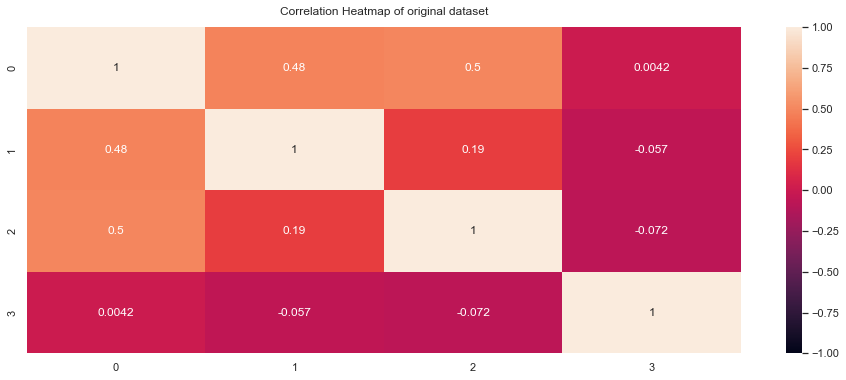

In [471]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(sample_corr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of original dataset', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'pairplot of original dataset')

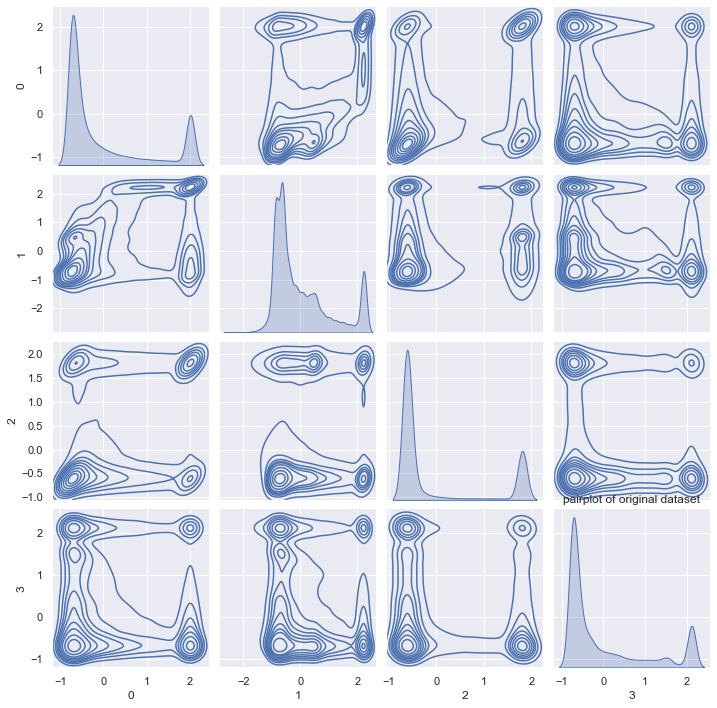

In [472]:
sns.pairplot(sample_corr, kind="kde")


## Dealing with imbalance dataset

Good place to learn various technique to deal with imbalance dataset:
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

This code uses some parts of the code provided in this blog.

 The startegy we are going to use here to balance out the dataset consists of two steps: 
 1) Cut down the size of the *"white"* lable to 10^4.
 
 2) Use SMOTE(Synthetic Minority Oversampling Technique) algorithm to create synthetic datapoints for "montrealDMALocker", "montrealDMALockerv3", "montrealNoobCrypt", and "montrealCryptXXX" labels.


In [473]:
tobe_dropped = len(df[df['label']=="white"]) - len(df[df['label']=='paduaCryptoWall'])
print('Total number of datasample with "white" label after cutting it down:  ', len(df[df['label']=='paduaCryptoWall']))

Total number of datasample with "white" label after cutting it down:   12390


In [474]:
# Lets drop the "white" label datapoints
df.drop(df.loc[df['label']=='white'].sample(frac=0.97).index, inplace=True)

In [475]:
df.head()

,year,length,weight,count,income,label
0,2017,18.0,4.787492,1.0,100050000.0,princetonCerber
1,2016,44.0,8.317765,1.0,100000000.0,princetonLocky
2,2016,0.0,-0.000000,1.0,200000000.0,princetonCerber
3,2016,70.0,5.545177,1.0,71200000.0,princetonCerber
4,2016,70.0,2.619375,18.5,200000000.0,princetonLocky


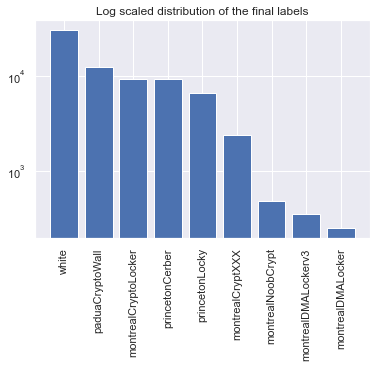

In [476]:
plotting_labels()

In [477]:
# SMOTE to create synthetic datapoints

X, y = df.iloc[:,:-1], df.iloc[:,-1]

# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1) 

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

df.head()

Original dataset shape Counter({'white': 30215, 'paduaCryptoWall': 12390, 'montrealCryptoLocker': 9315, 'princetonCerber': 9223, 'princetonLocky': 6625, 'montrealCryptXXX': 2419, 'montrealNoobCrypt': 483, 'montrealDMALockerv3': 354, 'montrealDMALocker': 251})
Resample dataset shape Counter({'princetonCerber': 30215, 'princetonLocky': 30215, 'montrealCryptoLocker': 30215, 'montrealCryptXXX': 30215, 'paduaCryptoWall': 30215, 'montrealDMALockerv3': 30215, 'montrealNoobCrypt': 30215, 'montrealDMALocker': 30215, 'white': 30215})


,year,length,weight,count,income,label
0,2017,18.0,4.787492,1.0,100050000.0,princetonCerber
1,2016,44.0,8.317765,1.0,100000000.0,princetonLocky
2,2016,0.0,-0.000000,1.0,200000000.0,princetonCerber
3,2016,70.0,5.545177,1.0,71200000.0,princetonCerber
4,2016,70.0,2.619375,18.5,200000000.0,princetonLocky


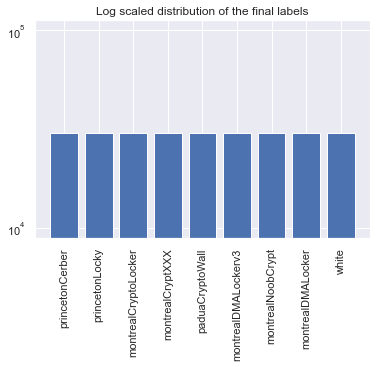

In [478]:
plotting_labels()

## Correlation and pairplot for dataset after balancing it i.e. cutting & SMOTE

Just for convience, we are checking the correlation of a sample of dataset

In [479]:
from sklearn.utils import shuffle
X_scaled = shuffle(scaling(df.iloc[:,1:-1]))
sample_corr = pd.DataFrame(X_scaled).iloc[:104822,:]
sample_corr.columns = df.columns[1:-1]

In [480]:
sample_corr.head()

,0,1,2,3
0,-0.802602,-0.474059,-0.673458,-0.332193
1,-0.323087,-0.243473,-0.582404,-0.149834
2,1.500110,1.316519,1.605764,-0.428944
3,1.783272,2.176803,1.886038,0.014354
4,0.720127,0.844417,0.833738,0.359973


Text(0.5, 1.0, 'Correlation Heatmap')

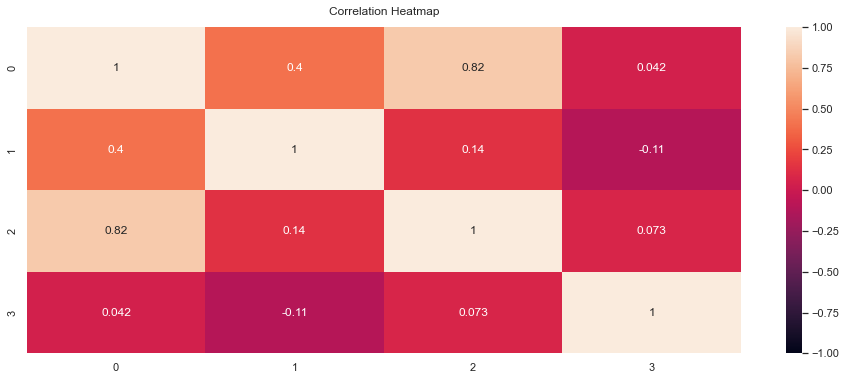

In [481]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(sample_corr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

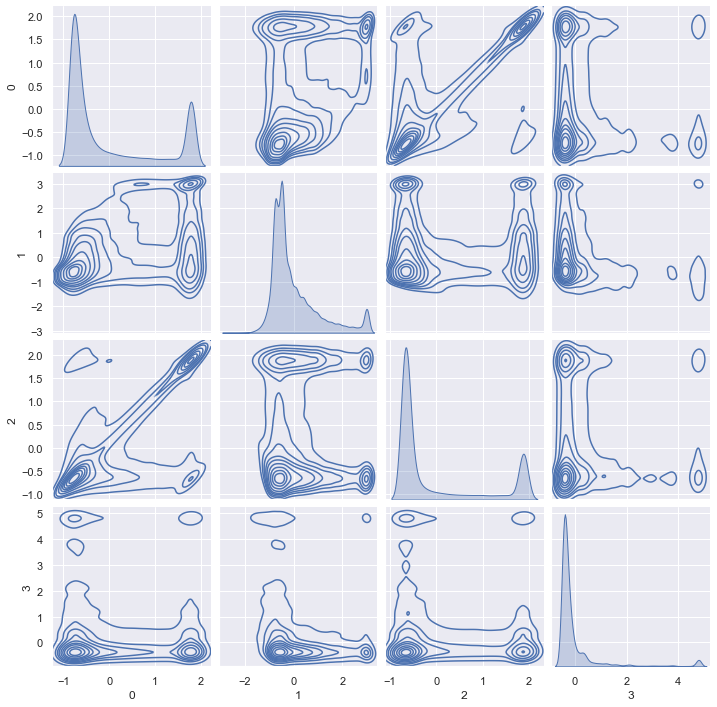

In [482]:
sns.pairplot(sample_corr, kind="kde")

## Encoding categorical features (years & label)

In [483]:
df.head()

,year,length,weight,count,income,label
0,2017,18.0,4.787492,1.0,100050000.0,princetonCerber
1,2016,44.0,8.317765,1.0,100000000.0,princetonLocky
2,2016,0.0,-0.000000,1.0,200000000.0,princetonCerber
3,2016,70.0,5.545177,1.0,71200000.0,princetonCerber
4,2016,70.0,2.619375,18.5,200000000.0,princetonLocky


In [487]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='year',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded

,year_2017.0,year_2016.0,year_2013.0,year_2014.0,year_2015.0,year_2012.0,year_2011.0,length,weight,count,income,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000,4.787492,1.0,1.000500e+08,princetonCerber
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44.000000,8.317765,1.0,1.000000e+08,princetonLocky
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,1.0,2.000000e+08,princetonCerber
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.000000,5.545177,1.0,7.120000e+07,princetonCerber
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.000000,2.619375,18.5,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...,...,...
271930,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.000000,1.0,1.500000e+08,princetonLocky
271931,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.693147,1.0,5.000000e+07,princetonLocky
271932,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.000000,5.262868,18.5,4.000000e+08,princetonLocky
271933,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.693147,1.0,4.100000e+08,princetonLocky


In [490]:
data_encoded=pd.get_dummies(data=df['year'],drop_first=True)
data = pd.concat([pd.DataFrame(data_encoded), df.iloc[:,1:]], axis=1)
data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data

,2012,2013,2014,2015,2016,2017,length,weight,count,income,label
0,0,0,0,0,0,1,18.000000,4.787492,1.0,1.000500e+08,6
1,0,0,0,0,1,0,44.000000,8.317765,1.0,1.000000e+08,7
2,0,0,0,0,1,0,0.000000,-0.000000,1.0,2.000000e+08,6
3,0,0,0,0,1,0,70.000000,5.545177,1.0,7.120000e+07,6
4,0,0,0,0,1,0,70.000000,2.619375,18.5,2.000000e+08,7
...,...,...,...,...,...,...,...,...,...,...,...
271930,0,0,0,0,1,0,2.000000,0.000000,1.0,1.500000e+08,7
271931,0,0,0,0,1,0,2.000000,0.693147,1.0,5.000000e+07,7
271932,0,0,0,0,1,0,70.000000,5.262868,18.5,4.000000e+08,7
271933,0,0,0,0,1,0,4.000000,0.693147,1.0,4.100000e+08,7
